In [9]:
import sys, os
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt

from lib.graph.adjacency import grid_adj, normalize_adj, invert_adj
from lib.graph.coarsening import coarsen_adj
from lib.graph.laplacian import laplacian

%matplotlib inline

# MNIST grid graph

In [10]:
adj = grid_adj((28, 28))
adj = normalize_adj(adj)
adj = invert_adj(adj)
print('Number of nodes:', adj.shape[0])
print('Number of edges:', adj.nnz // 2)

Number of nodes: 784
Number of edges: 1512


## Coarsen graph

In [11]:
LEVELS = 4
adjs, _ = coarsen_adj(adj, LEVELS)
for i in range(LEVELS + 1):
    print('Level {}:'.format(i), adjs[i].shape[0], 'nodes,', adjs[i].nnz // 2, 'edges')

Level 0: 1008 nodes, 1512 edges
Level 1: 504 nodes, 1025 edges
Level 2: 252 nodes, 579 edges
Level 3: 126 nodes, 312 edges
Level 4: 63 nodes, 159 edges


## Laplacian

(0, 2.1000000023719698)

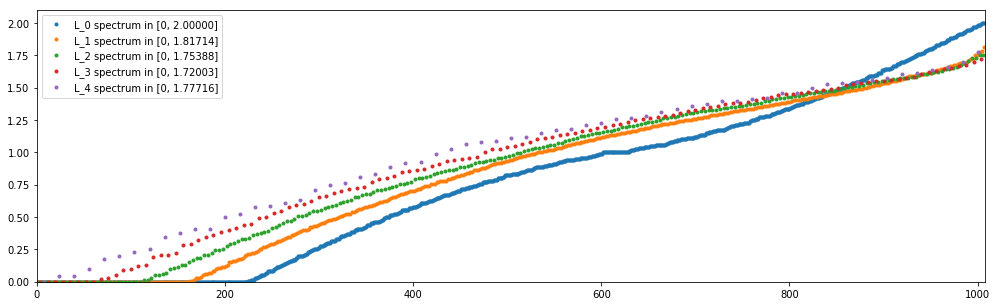

In [12]:
NORMALIZED = True
laps = [laplacian(A, NORMALIZED) for A in adjs]

plt.figure(figsize=(17, 5))
for i, lap in enumerate(laps):
    lamb, U = np.linalg.eig(lap.toarray())
    perm = lamb.argsort()
    lamb = lamb[perm]
    U = U[:, perm]
    step = 2**i
    x = range(step // 2, laps[0].shape[0], step)
    lb = 'L_{} spectrum in [{}, {:.5f}]'.format(i, 0, lamb[-1])
    plt.plot(x, np.real(lamb), '.', label=lb)
plt.legend(loc='best')
plt.xlim(0, laps[0].shape[0])
plt.ylim(ymin=0)